# Business Analysis of Blinkit-like Data

### *Objective* : Analyze business operations using Python and create insights for Power BI.

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)



### 2. Generate Blinkit-like Business Data

In [2]:
# Generate Synthetic Data
np.random.seed(42)
num_rows = 50000  

data = {
    "Order_ID": range(1001, 1001 + num_rows),
    "Customer_ID": np.random.randint(5000, 50000, num_rows),
    "Order_Date": pd.date_range(start="2023-01-01", periods=num_rows, freq="T"),
    "City": np.random.choice(["Delhi", "Mumbai", "Bangalore", "Hyderabad", "Chennai"], num_rows),
    "Order_Value": np.random.uniform(50, 1500, num_rows).round(2),
    "Delivery_Time_Minutes": np.random.randint(5, 90, num_rows),
    "Payment_Method": np.random.choice(["Credit Card", "UPI", "Cash on Delivery", "Wallet"], num_rows),
    "Customer_Rating": np.random.uniform(1, 5, num_rows).round(1),
}

# Create DataFrame
df = pd.DataFrame(data)

# Show first 5 rows
df.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_20616\4260124742.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  "Order_Date": pd.date_range(start="2023-01-01", periods=num_rows, freq="T"),


,Order_ID,Customer_ID,Order_Date,City,Order_Value,Delivery_Time_Minutes,Payment_Method,Customer_Rating
0,1001,20795,2023-01-01 00:00:00,Bangalore,1462.06,63,UPI,4.10
1,1002,5860,2023-01-01 00:01:00,Hyderabad,280.88,56,Cash on Delivery,1.90
2,1003,43158,2023-01-01 00:02:00,Chennai,1194.49,8,Credit Card,2.80
3,1004,49732,2023-01-01 00:03:00,Delhi,867.41,27,UPI,1.80
4,1005,16284,2023-01-01 00:04:00,Delhi,1363.63,60,UPI,3.20


### 3. Data Cleaning & Summary

In [3]:
# Data Summary
print("Data Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order_ID               50000 non-null  int64         
 1   Customer_ID            50000 non-null  int32         
 2   Order_Date             50000 non-null  datetime64[ns]
 3   City                   50000 non-null  object        
 4   Order_Value            50000 non-null  float64       
 5   Delivery_Time_Minutes  50000 non-null  int32         
 6   Payment_Method         50000 non-null  object        
 7   Customer_Rating        50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 2.7+ MB
None

Missing Values:
Order_ID                 0
Customer_ID              0
Order_Date               0
City                     0
Order_Value              0
Delivery_Time_Minutes    0
Payment_Method  

### 4. Exploratory Data Analysis (EDA)

In [4]:
# Sales Analysis
total_revenue = df["Order_Value"].sum()
average_order_value = df["Order_Value"].mean()
city_sales = df.groupby("City")["Order_Value"].sum().sort_values(ascending=False)

# Customer Behavior
average_order_per_city = df.groupby("City")["Order_Value"].mean().round(2)
payment_method_distribution = df["Payment_Method"].value_counts()

# Delivery Performance
average_delivery_time = df["Delivery_Time_Minutes"].mean()
delivery_time_per_city = df.groupby("City")["Delivery_Time_Minutes"].mean().round(2)

# Customer Satisfaction
average_rating = df["Customer_Rating"].mean()
rating_per_city = df.groupby("City")["Customer_Rating"].mean().round(2)
rating_per_payment = df.groupby("Payment_Method")["Customer_Rating"].mean().round(2)

# Display Results
print("Total Revenue: ₹", total_revenue)
print("Average Order Value: ₹", average_order_value)
print("\nCity-wise Sales:")
print(city_sales)



Total Revenue: ₹ 38718966.86
Average Order Value: ₹ 774.3793372

City-wise Sales:
City
Delhi       7852114.38
Mumbai      7772852.88
Chennai     7743118.33
Hyderabad   7713359.63
Bangalore   7637521.64
Name: Order_Value, dtype: float64


### 5. Data Visualization

C:\Users\Asus\AppData\Local\Temp\ipykernel_20616\92100690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="viridis")


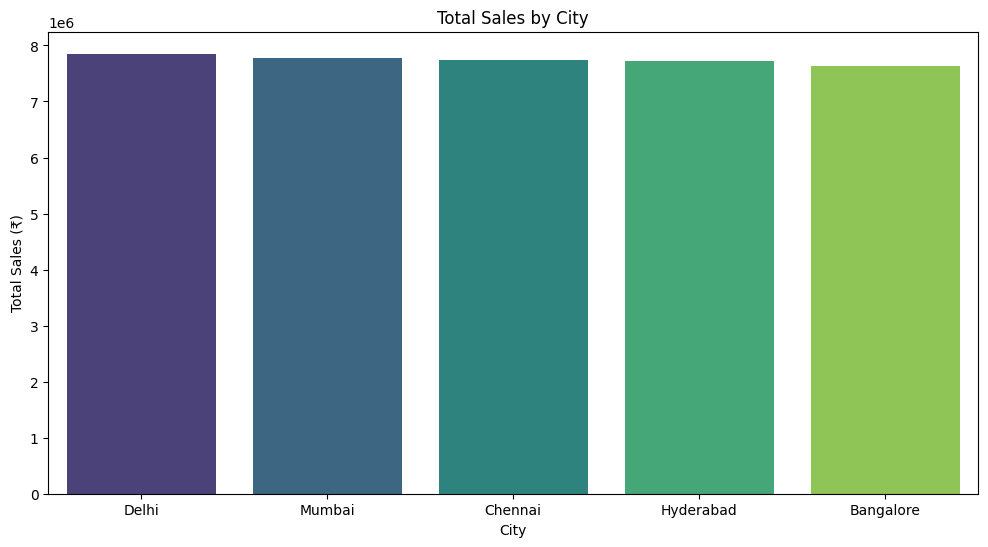

C:\Users\Asus\AppData\Local\Temp\ipykernel_20616\92100690.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="Order_Value", data=df, palette="coolwarm")


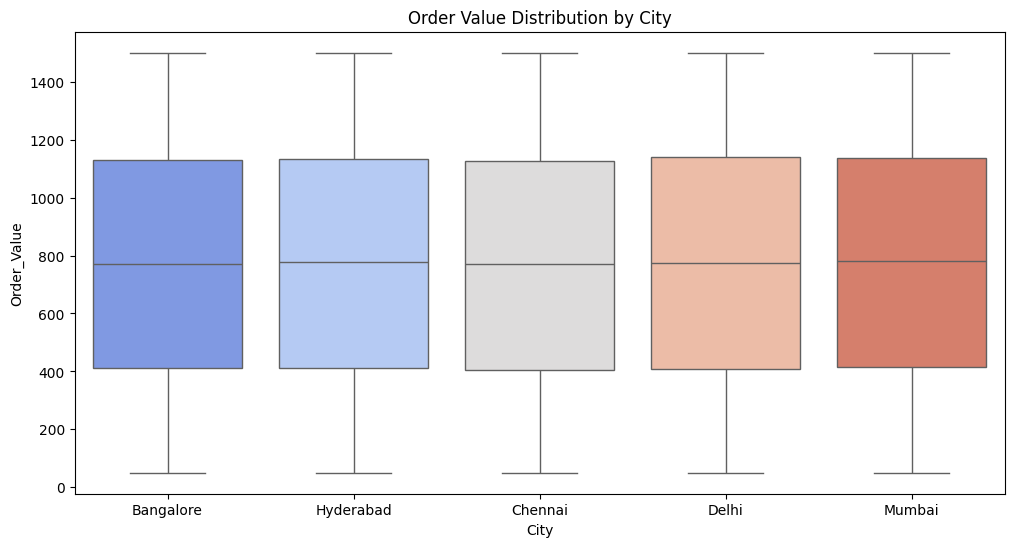

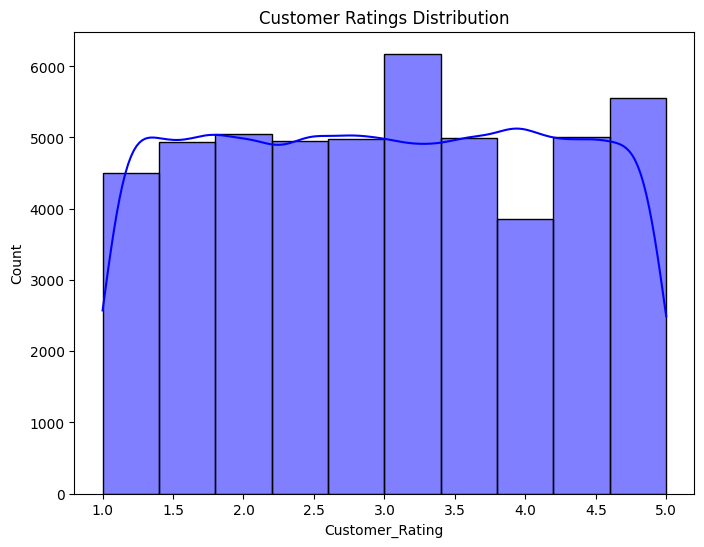

In [5]:
# Total Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="viridis")
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales (₹)")
plt.show()

# Order Value Distribution by City
plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="Order_Value", data=df, palette="coolwarm")
plt.title("Order Value Distribution by City")
plt.show()

# Customer Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Customer_Rating"], bins=10, kde=True, color="blue")
plt.title("Customer Ratings Distribution")
plt.show()


### 6. Export Data for Power BI

In [6]:
# Export Data to CSV
df.to_csv("blinkit_business_data.csv", index=False)
print("CSV file saved successfully!")


CSV file saved successfully!
